In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader

In [2]:
file = './HadISST_sst.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']
time = dataset.variables['time']
sst =dataset.variables['sst']

In [39]:
longitude[:].data.shape

(360,)

In [4]:
time

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: days since 1870-1-1 0:0:0
    calendar: gregorian
    long_name: Time
    standard_name: time
unlimited dimensions: time
current shape = (1838,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [29]:
sum_month = np.zeros(sst[:1].data.shape, dtype=float, order='C') # 创建空矩阵
num_month = time[:].data.shape[0] # 创建空时间矩阵
#计算1980年1月到1999年12月的月数 时间从1870年开始按月算
num_month_firt = (1999 - 1980 + 1) * 12
#计算2000年1月到2022年12月的月数
num_mon_second = (2022 - 2000 + 1) * 12 + 2

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_firt = sum_month
count1 = 0
ls_first = []
mean_firt = sum_month
# 第1320是1980年1月
for i in range(1319, 1319+num_month_firt): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_firt += temp_pre
    count1 += 1
mean_firt = sum_month_firt / num_month_firt

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_second = sum_month
count2 = 0
ls_first = []
mean_second = sum_month
for i in range(1429, 1429+num_mon_second): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_second += temp_pre
    count2 += 1
mean_second = sum_month_second / num_mon_second

diff = mean_second - mean_firt

In [27]:
def sst_mean(sst, begin_month, num_month):
    """
    sst: 计算的图标，begin_month：开始月份 num_month：每个阶段的月数
    """
    sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
    sum_month_tmp = sum_month
    count = 0
    mean = sum_month
    # 第1320是1980年1月
    for i in range(begin_month, begin_month+num_month): 
        temp_pre = sst[i:i+1].data[0][44:136,:]
    #     ls_first.append(sst[i:i+1].data[0][:1,-1:])
        sum_month_tmp += temp_pre
        count += 1
    mean = sum_month_tmp / num_month
    return mean
    
mean_firt_1 = sst_mean(sst, 1319, num_month_firt)
mean_second_1 = sst_mean(sst, 1429, num_mon_second)

In [33]:
mean_two_phase = sst_mean(sst, 1319, num_month_firt+num_mon_second)

In [15]:
print(diff.max(), diff.min())

0.9381403183908485 -0.5286386950124644


In [41]:
latitude[44:136].data

array([ 45.5,  44.5,  43.5,  42.5,  41.5,  40.5,  39.5,  38.5,  37.5,
        36.5,  35.5,  34.5,  33.5,  32.5,  31.5,  30.5,  29.5,  28.5,
        27.5,  26.5,  25.5,  24.5,  23.5,  22.5,  21.5,  20.5,  19.5,
        18.5,  17.5,  16.5,  15.5,  14.5,  13.5,  12.5,  11.5,  10.5,
         9.5,   8.5,   7.5,   6.5,   5.5,   4.5,   3.5,   2.5,   1.5,
         0.5,  -0.5,  -1.5,  -2.5,  -3.5,  -4.5,  -5.5,  -6.5,  -7.5,
        -8.5,  -9.5, -10.5, -11.5, -12.5, -13.5, -14.5, -15.5, -16.5,
       -17.5, -18.5, -19.5, -20.5, -21.5, -22.5, -23.5, -24.5, -25.5,
       -26.5, -27.5, -28.5, -29.5, -30.5, -31.5, -32.5, -33.5, -34.5,
       -35.5, -36.5, -37.5, -38.5, -39.5, -40.5, -41.5, -42.5, -43.5,
       -44.5, -45.5], dtype=float32)

0.9381403183908485 -0.5286386950124644


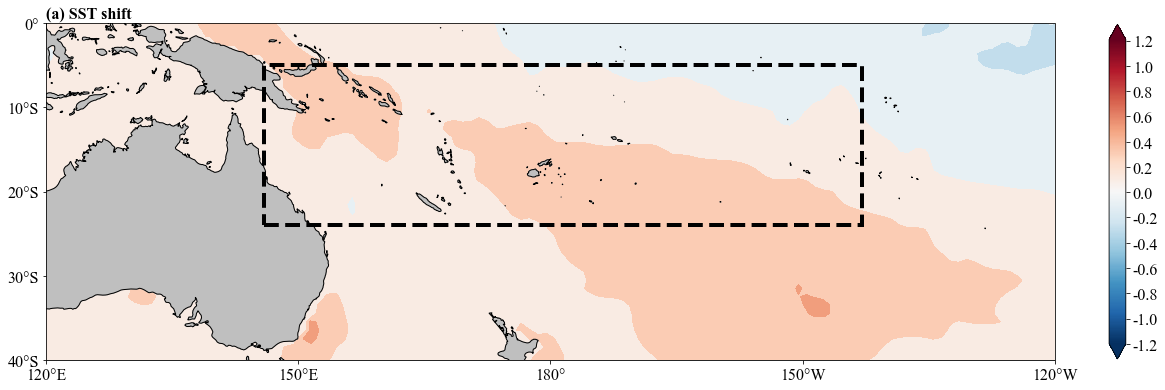

In [35]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

from matplotlib import rcParams
from matplotlib import patches

# 设置字体
config = {
    "font.family": 'Times New Roman',
    "font.size": 16,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

MAX = 1.21
MIN = -1.2
INTER = 0.2
# 设置经纬度
lon = longitude[:].data
lat = latitude[44:136].data
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())


fig = plt.figure(figsize=(15,5))


proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (120,240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(a) SST shift',loc='left',fontsize =16, fontweight='bold')
# fig_ax1.contourf(lon, lat, diff, 
#                 levels=bins, 
# #                 color=['blue','red','yellow','black'],
# #                 hatches='///',
#                 transform=cartopy.crs.PlateCarree(),
#                cmap=plt.cm.RdBu_r)
cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(MIN, MAX, INTER),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

black_quarter = patches.Rectangle((146,-24),71,19,linestyle = 'dashed', 
                                  lw=4, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax1.add_patch(black_quarter)

norm = colors.Normalize(vmin=MIN, vmax=MAX)    #确定colormap的最大最小值

# cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-1.25,1.25,8))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(MIN, MAX, INTER).tolist(),                                                    
                 extend='both',
                fraction=0.0155) 

# plt.colorbar(cont,fraction=0.012)

plt.savefig("sst_shift20231203.png",dpi=300,bbox_inches='tight')
plt.show()

In [37]:
mean_two_phase

array([[ 8.59558808,  8.62587309,  8.63740586, ...,  8.43170134,
         8.48974588,  8.54294584],
       [ 9.56044049,  9.5766062 ,  9.57023456, ...,  9.40189579,
         9.46102528,  9.51128077],
       [10.63737994, 10.63811567, 10.61575695, ..., 10.49849912,
        10.55691494, 10.59943437],
       ...,
       [13.55123478, 13.64709299, 13.7598971 , ..., 13.25539571,
        13.3638029 , 13.46032748],
       [12.56585416, 12.70928078, 12.89447284, ..., 12.28382568,
        12.358504  , 12.45113141],
       [11.7872706 , 11.95161954, 12.177143  , ..., 11.50490203,
        11.5795996 , 11.6702662 ]])